# UBC Bolt First Byte 2025

#### Mission:

- As audiences shift online, new technologies arise, and competing clubs expand their global footprint, Vancouver City must decide how to evolve and where to invest, in order to secure its future on and off the pitch.
- The club’s mission is to grow the game, empower fans, and strengthen connections between players, supporters, and the city it represents.

#### Context

- sales have continued to decline. Overall earnings have fallen from roughly $60 million in prior years to materially lower levels today
- The club’s three primary sources of revenue, including stadium operations, merchandise sales, and fanbase engagement, have all been impacted by these issues. Matchday turnout and in-stadium spending are falling, online sales are down by 30% compared to prior seasons, and global engagement remains underdeveloped

In [1]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec

## Load Data

In [2]:
merch_dat = pd.read_excel(r"data\BOLT UBC First Byte - Merchandise Sales.xlsx")
stadium_dat = pd.read_excel(r"data\BOLT UBC First Byte - Stadium Operations.xlsx")
fan_dat = pd.read_excel(r"data\BOLT UBC First Byte - Fanbase Engagement.xlsx")

In [3]:
merch_dat.sample(5)

,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date
45648,10000003,20045648,Hoodie,Training Hoodie,M,75,18–25,Domestic,True,Online,2024-06-02 19:49:00,10029440,2024-06-11 13:11:00
62762,10000014,20062762,Youth Hoodie,Youth Training Hoodie,YS,50,<18,Domestic,True,Online,2024-07-14 04:52:00,10033520,2024-07-23 17:01:00
40309,10000014,20040309,Youth Hoodie,Youth Training Hoodie,YL,50,<18,Domestic,False,Online,2024-04-12 17:36:00,10022087,2024-04-21 18:33:00
60774,10000002,20060774,Hoodie,Team Hoodie,S,75,26–40,Domestic,False,Online,2024-08-27 13:57:00,10037791,2024-09-04 13:44:00
51403,10000005,20051403,Jersey,Home Jersey,XL,152,18–25,Domestic,False,Online,2024-06-26 08:41:00,10031738,2024-07-04 08:19:00


In [4]:
merch_dat['Customer_Region'].unique()

array(['Domestic', 'International'], dtype=object)

In [5]:
stadium_dat.sample(5)

,Month,Source,Revenue
52,5,Food,1723476
134,3,Advertising,432000
16,5,Lower Bowl,2122992
59,12,Food,0
7,8,Upper Bowl,462672


In [6]:
fan_dat.sample(5)

,Membership_ID,Age_Group,Games_Attended,Seasonal_Pass,Customer_Region
12670,10003981,26-40,4,False,Canada
69688,10042587,18-25,7,False,Canada
35304,10042438,26-40,8,False,Canada
43259,10040148,18-25,7,False,Canada
25240,77017126,26-40,7,False,USA


## Summary Statistics and Basic Info

In [7]:
merch_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67877 entries, 0 to 67876
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product_ID          67877 non-null  int64         
 1   Barcode             67877 non-null  int64         
 2   Item_Category       67877 non-null  object        
 3   Item_Name           67877 non-null  object        
 4   Size                52041 non-null  object        
 5   Unit_Price          67877 non-null  int64         
 6   Customer_Age_Group  67877 non-null  object        
 7   Customer_Region     67877 non-null  object        
 8   Promotion           67877 non-null  bool          
 9   Channel             67877 non-null  object        
 10  Selling_Date        67877 non-null  datetime64[ns]
 11  Member_ID           67877 non-null  int64         
 12  Arrival_Date        54302 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(4), objec

In [8]:
stadium_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    144 non-null    int64 
 1   Source   144 non-null    object
 2   Revenue  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [9]:
fan_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Membership_ID    70000 non-null  int64 
 1   Age_Group        70000 non-null  object
 2   Games_Attended   70000 non-null  int64 
 3   Seasonal_Pass    70000 non-null  bool  
 4   Customer_Region  70000 non-null  object
dtypes: bool(1), int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
merch_dat.shape

(67877, 13)

In [11]:
stadium_dat.shape

(144, 3)

In [12]:
fan_dat.shape

(70000, 5)

In [13]:
merch_dat.describe()

,Product_ID,Barcode,Unit_Price,Member_ID
count,6.787700e+04,6.787700e+04,67877.000000,6.787700e+04
mean,1.000001e+07,2.003394e+07,95.129882,1.002226e+07
std,4.603017e+00,1.959455e+04,49.893563,1.284130e+04
min,1.000000e+07,2.000000e+07,20.000000,1.000000e+07
25%,1.000000e+07,2.001697e+07,50.000000,1.001115e+07
50%,1.000000e+07,2.003394e+07,75.000000,1.002229e+07
75%,1.000001e+07,2.005091e+07,152.000000,1.003338e+07
max,1.000002e+07,2.006788e+07,152.000000,1.004452e+07


In [14]:
stadium_dat.describe()

,Month,Revenue
count,144.000000,1.440000e+02
mean,6.500000,9.189942e+04
std,3.464102,1.341148e+06
min,1.000000,-3.527500e+06
25%,3.750000,-1.751925e+05
50%,6.500000,1.420000e+05
75%,9.250000,4.378755e+05
max,12.000000,3.410190e+06


In [15]:
fan_dat.describe()

,Membership_ID,Games_Attended
count,7.000000e+04,70000.000000
mean,2.464124e+07,5.711414
std,2.595011e+07,5.168150
min,1.370000e+03,1.000000
25%,1.001510e+07,3.000000
50%,1.003260e+07,5.000000
75%,3.167822e+07,7.000000
max,9.999924e+07,30.000000


#### Age Group


In [16]:
# Merge on Member_ID
merged = merch_dat.merge(
    fan_dat,
    left_on='Member_ID',
    right_on='Membership_ID',
    how='inner',
    suffixes=('_merch', '_fan')
)

print(f"Merged dataset shape: {merged.shape}")
merged.sample(10)

Merged dataset shape: (67877, 18)


,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region_merch,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date,Membership_ID,Age_Group,Games_Attended,Seasonal_Pass,Customer_Region_fan
33503,10000004,20023045,Jersey,Away Jersey,L,152,18–25,Domestic,True,Online,2024-02-16 21:23:00,10009228,2024-02-25 15:56:00,10009228,26-40,23,True,Canada
41915,10000009,20030325,Poster,Player Poster,NaN,20,18–25,Domestic,False,Team Store,2024-05-13 14:23:00,10027430,NaT,10027430,18-25,4,False,Canada
58878,10000002,20052055,Hoodie,Team Hoodie,L,75,26–40,Domestic,True,Online,2024-03-07 10:26:00,10013733,2024-03-16 09:01:00,10013733,26-40,6,False,Canada
29556,10000003,20019863,Hoodie,Training Hoodie,S,75,41–60,Domestic,False,Team Store,2024-05-28 20:23:00,10028915,NaT,10028915,18-25,2,False,Canada
21603,10000003,20048442,Hoodie,Training Hoodie,M,75,26–40,International,True,Online,2024-02-23 12:20:00,10010743,2024-03-03 14:39:00,10010743,18-25,5,False,Canada
19441,10000012,20041496,Scarf,Home Scarf,NaN,40,<18,Domestic,True,Online,2024-03-14 10:50:00,10015339,2024-03-22 11:56:00,10015339,18-25,8,False,Canada
64288,10000004,20058924,Jersey,Away Jersey,M,152,18–25,Domestic,False,Online,2024-08-07 17:04:00,10035918,2024-08-15 12:59:00,10035918,26-40,1,False,Canada
42988,10000004,20031377,Jersey,Away Jersey,XXL,152,26–40,Domestic,True,Online,2024-06-01 14:23:00,10029273,2024-06-10 18:33:00,10029273,<18,8,False,Japan
6428,10000001,20010239,Cap,Retro Cap,NaN,35,<18,Domestic,False,Team Store,2023-12-27 13:38:00,10001426,NaT,10001426,26-40,3,False,Canada
28288,10000003,20018863,Hoodie,Training Hoodie,S,75,60+,Domestic,True,Online,2024-12-13 06:17:00,10043545,2024-12-22 11:53:00,10043545,18-25,5,False,Canada


In [17]:
merged['Customer_Region_merch'] = merged['Customer_Region_merch'].str.strip().str.title()
merged['Customer_Region_fan'] = merged['Customer_Region_fan'].str.strip().str.title()

In [18]:
domestic_regions = [
    'Canada'
]

merged['Expected_Group'] = np.where(
    merged['Customer_Region_fan'].isin(domestic_regions),
    'Domestic', 'International'
)


merged['Region_Mismatch'] = merged['Customer_Region_merch'] != merged['Expected_Group']


print("Total merged records:", len(merged))
print("Total mismatches:", merged['Region_Mismatch'].sum())

Total merged records: 67877
Total mismatches: 12258


In [19]:
merged.head()

,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region_merch,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date,Membership_ID,Age_Group,Games_Attended,Seasonal_Pass,Customer_Region_fan,Expected_Group,Region_Mismatch
0,10000000,20000000,Cap,Classic Cap,NaN,35,18–25,Domestic,False,Online,2024-02-14 09:30:00,10008632,2024-02-22 13:49:00,10008632,<18,5,False,Canada,Domestic,False
1,10000001,20067437,Cap,Retro Cap,NaN,35,18–25,International,False,Team Store,2024-02-14 09:59:00,10008632,NaT,10008632,<18,5,False,Canada,Domestic,True
2,10000000,20000001,Cap,Classic Cap,NaN,35,26–40,Domestic,False,Team Store,2024-01-31 14:30:00,10005467,NaT,10005467,18-25,2,False,Canada,Domestic,False
3,10000006,20015654,Jersey,Retro Jersey,L,152,18–25,Domestic,False,Team Store,2024-01-31 17:32:00,10005467,NaT,10005467,18-25,2,False,Canada,Domestic,False
4,10000000,20000002,Cap,Classic Cap,NaN,35,18–25,Domestic,False,Team Store,2024-04-30 18:57:00,10026081,NaT,10026081,18-25,6,False,Canada,Domestic,False


C:\Users\vince\AppData\Local\Temp\ipykernel_7500\3876034056.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(region_check.pivot('Customer_Region_merch','Expected_Group','count'),


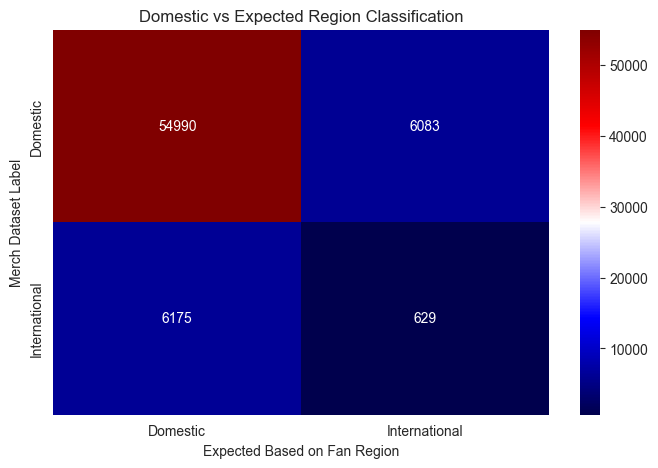

In [70]:
region_check = (
    merged.groupby(['Customer_Region_merch', 'Expected_Group'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(8,5))
sns.heatmap(region_check.pivot('Customer_Region_merch','Expected_Group','count'),
            annot=True, fmt='.0f', cmap='seismic')
plt.title('Domestic vs Expected Region Classification')
plt.xlabel('Expected Based on Fan Region')
plt.ylabel('Merch Dataset Label')
plt.show()

C:\Users\vince\AppData\Local\Temp\ipykernel_7500\3047016450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


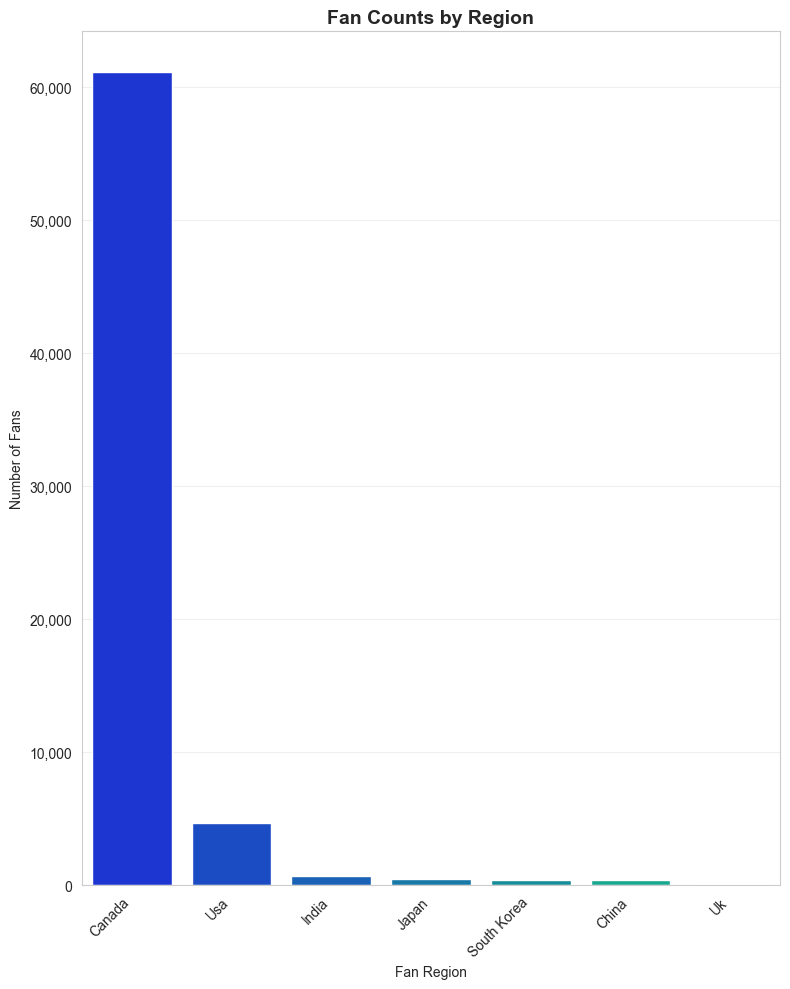

In [78]:
plt.figure(figsize=(8,10))
sns.countplot(
    data=merged,
    x='Customer_Region_fan',
    order=merged['Customer_Region_fan'].value_counts().index,
    palette='winter'
)

plt.title('Fan Counts by Region', fontsize=14, fontweight='bold')
plt.xlabel('Fan Region')
plt.ylabel('Number of Fans')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

### Missing Values

In [21]:
merch_dat.isna().sum()

Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Size                  15836
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
Arrival_Date          13575
dtype: int64

In [22]:
stadium_dat.isna().sum()

Month      0
Source     0
Revenue    0
dtype: int64

In [23]:
fan_dat.isna().sum()

Membership_ID      0
Age_Group          0
Games_Attended     0
Seasonal_Pass      0
Customer_Region    0
dtype: int64

### Exploring Merch Dat Missing Values

**Size Exploration**

In [24]:
merch_dat.isna().sum().sort_values(ascending=False)

Size                  15836
Arrival_Date          13575
Product_ID                0
Barcode                   0
Item_Category             0
Item_Name                 0
Unit_Price                0
Customer_Age_Group        0
Customer_Region           0
Promotion                 0
Channel                   0
Selling_Date              0
Member_ID                 0
dtype: int64

In [25]:
merch_dat['Size'].value_counts(dropna=False)

NaN    15836
L      11843
M      11769
XL      7266
S       6545
YM      4398
YS      3932
XXL     3521
YL      2767
Name: Size, dtype: int64

In [28]:
# Ask how to deal with this data fill data with not applicable
merch_dat['Size'] = merch_dat['Size'].fillna('Not Applicable') #filling missing values witih unknown size

merch_dat.head()

,Product_ID,Barcode,Item_Category,Item_Name,Size,Unit_Price,Customer_Age_Group,Customer_Region,Promotion,Channel,Selling_Date,Member_ID,Arrival_Date
0,10000000,20000000,Cap,Classic Cap,Not Applicable,35,18–25,Domestic,False,Online,2024-02-14 09:30:00,10008632,2024-02-22 13:49:00
1,10000000,20000001,Cap,Classic Cap,Not Applicable,35,26–40,Domestic,False,Team Store,2024-01-31 14:30:00,10005467,NaT
2,10000000,20000002,Cap,Classic Cap,Not Applicable,35,18–25,Domestic,False,Team Store,2024-04-30 18:57:00,10026081,NaT
3,10000000,20000003,Cap,Classic Cap,Not Applicable,35,<18,Domestic,True,Online,2024-02-01 18:25:00,10005726,2024-02-09 12:35:00
4,10000000,20000004,Cap,Classic Cap,Not Applicable,35,<18,International,False,Team Store,2024-11-24 14:07:00,10042598,NaT


**Arrival Date Exploration**

In [29]:
merch_dat['Arrival_Date'].isna().mean()

0.19999410698763942

In [30]:
#sns.heatmap(merch_dat.isna(), cbar=False)
#plt.title('Missing Value Pattern – Merchandise Data')
#plt.show()

#Order by Missing Item Category (TY GPT)
merch_dat.groupby('Item_Category')['Arrival_Date'].apply(lambda x: x.isna().mean()).sort_values(ascending=False).head(10)

Item_Category
Poster          0.212020
Mug             0.206436
Cap             0.201973
Scarf           0.200796
Youth Jersey    0.200632
Jersey          0.198645
Youth Hoodie    0.197620
Hoodie          0.197545
Name: Arrival_Date, dtype: float64

In [31]:
# Compute median arrival-to-sell lag per category
#med_lag = (merch_dat['Selling_Date'] - merch_dat['Arrival_Date']).dt.days.median()

# Fill missing arrival dates using selling date minus median lag
#merch_dat['Arrival_Date'] = merch_dat['Arrival_Date'].fillna(
#    merch_dat['Selling_Date'] - pd.to_timedelta(med_lag, unit='d')
#)

## Stadium Analysis

In [32]:
stadium_dat['Source'].value_counts()

Upper Bowl     12
Lower Bowl     12
Season         12
Premium        12
Food           12
Staff          12
Concert        12
Conference     12
Insurance      12
Maintenance    12
Utilities      12
Advertising    12
Name: Source, dtype: int64

In [33]:
# Pivot for better readability
stadium_pivot = stadium_dat.pivot_table(values='Revenue', index='Month', columns='Source', aggfunc='sum')
stadium_pivot.head()

Source,Advertising,Concert,Conference,Food,Insurance,Lower Bowl,Maintenance,Premium,Season,Staff,Upper Bowl,Utilities
Month,,,,,,,,,,,,
1,437600,450000,240000,443982,-160000,1154980,-1500000,35145,0,-2765000,25020,-269093
2,485000,0,75000,2777643,-160000,3327450,-540000,398400,527340,-3400000,686664,-220770
3,432000,0,70000,2596206,-160000,3204408,-415000,272160,535923,-3318000,434112,-221023
4,395000,0,146000,2227200,-160000,2628288,-430000,243033,478674,-3362000,390879,-235475
5,372700,285000,71000,1723476,-160000,2122992,-500000,169320,438702,-3361500,286524,-301120


### Fan Analysis

In [34]:
fan_dat.groupby(['Age_Group', 'Customer_Region']).size().sort_values(ascending=False).head(10)

# Remove impossible values
#fan = fan[(fan['Games_Attended'] >= 0) & (fan['Games_Attended'] <= 50)]

# Validate IDs
#fan_dat['Membership_ID'].nunique()  # should match len(fan)

Age_Group  Customer_Region
18-25      Canada             28163
26-40      Canada             15836
41-60      Canada              9486
<18        Canada              6393
60+        Canada              3096
18-25      USA                 2245
26-40      USA                 1252
41-60      USA                  730
<18        USA                  496
18-25      India                313
dtype: int64

### Duplicate Values

In [35]:
merch_dat.duplicated().sum()

0

In [36]:
stadium_dat.duplicated().sum()

0

In [37]:
fan_dat.duplicated().sum()

0

No Duplicate Values

## EDA

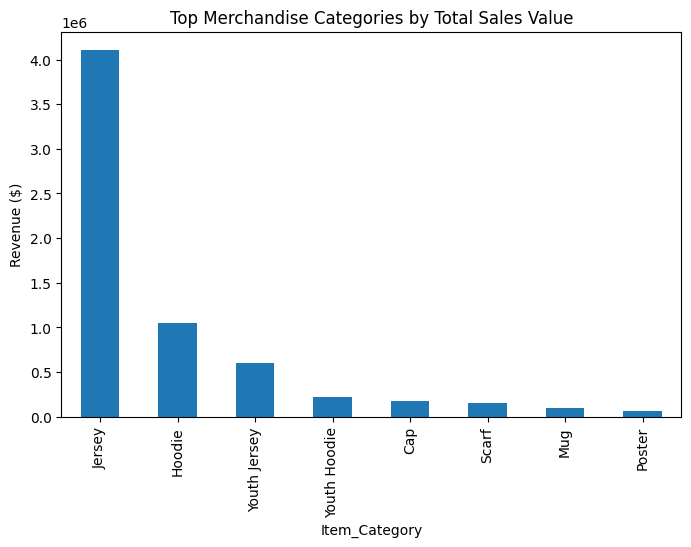

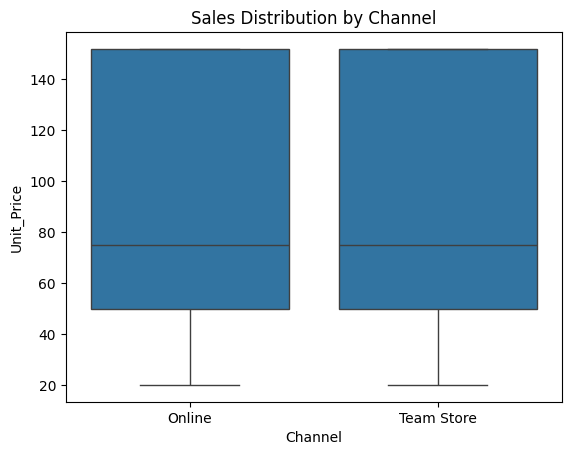

In [38]:
# Top-selling categories
plt.figure(figsize=(8,5))
merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Merchandise Categories by Total Sales Value')
plt.ylabel('Revenue ($)')
plt.show()

# Channel performance
sns.boxplot(x='Channel', y='Unit_Price', data=merch_dat)
plt.title('Sales Distribution by Channel')
plt.show()

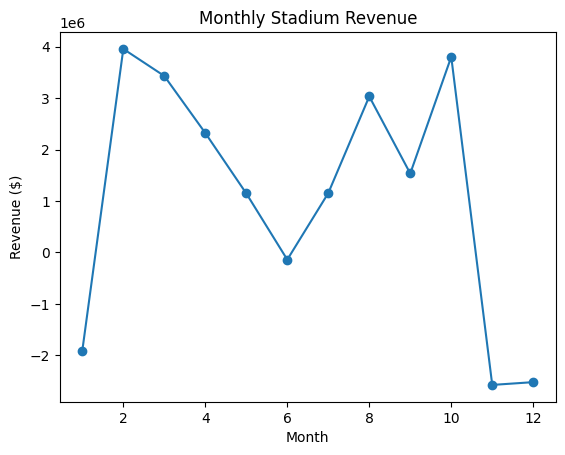

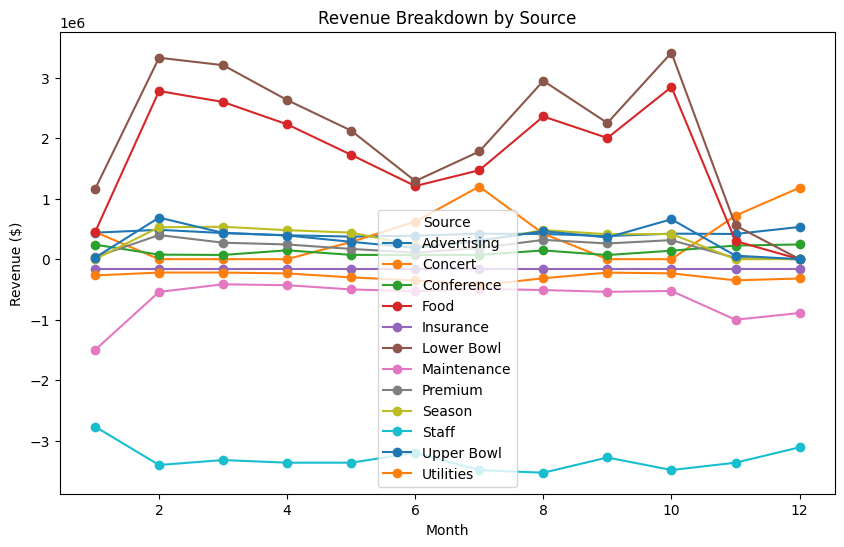

In [39]:
# Monthly revenue trend
stadium_dat.groupby('Month')['Revenue'].sum().plot(marker='o')
plt.title('Monthly Stadium Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.show()

# Compare sources (ticket, concessions, etc.)
stadium_pivot.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Revenue Breakdown by Source')
plt.ylabel('Revenue ($)')
plt.show()

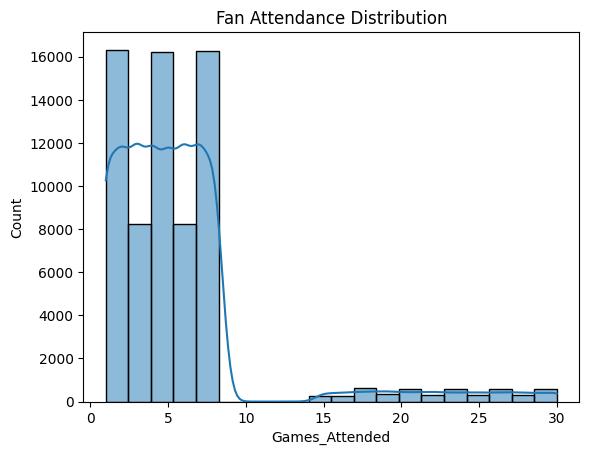

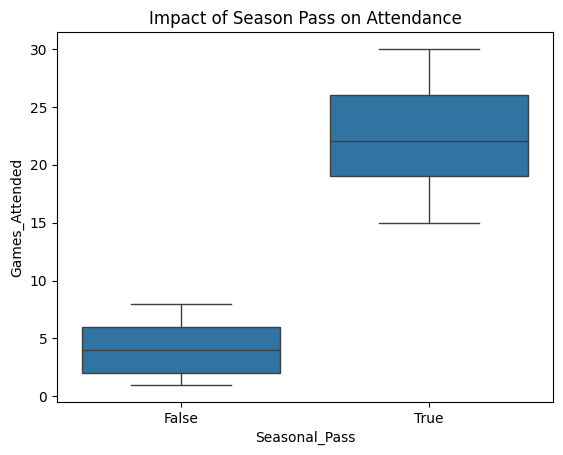

In [40]:
# Attendance distribution
sns.histplot(fan_dat['Games_Attended'], bins=20, kde=True)
plt.title('Fan Attendance Distribution')
plt.show()

# Seasonal pass effect
sns.boxplot(x='Seasonal_Pass', y='Games_Attended', data=fan_dat)
plt.title('Impact of Season Pass on Attendance')
plt.show()

### Feature Engineer

#### Merch

In [41]:
# 1. Days to Sell (only where both dates are present)
merch_dat['Days_to_Sell'] = (merch_dat['Arrival_Date']- merch_dat['Selling_Date']).dt.days
merch_dat['Days_to_Sell'] = merch_dat['Days_to_Sell'].clip(lower=0)

# 2. Discounted Item (Promotion → 0/1)
merch_dat['Discounted_Item'] = merch_dat['Promotion'].astype(int)

# 3. Revenue proxy (assuming each row = 1 sold item)
merch_dat['Revenue'] = merch_dat['Unit_Price']  # if quantity not given

# 4. Youth-size flag
merch_dat['Is_Youth_Size'] = merch_dat['Size'].str.contains('Y|Youth', case=False, na=False).astype(int)

# --- Quick check ---
merch_dat[['Unit_Price', 'Discounted_Item', 'Is_Youth_Size', 'Days_to_Sell', 'Revenue']].head()

,Unit_Price,Discounted_Item,Is_Youth_Size,Days_to_Sell,Revenue
0,35,0,0,8.0,35
1,35,0,0,NaN,35
2,35,0,0,NaN,35
3,35,1,0,7.0,35
4,35,0,0,NaN,35


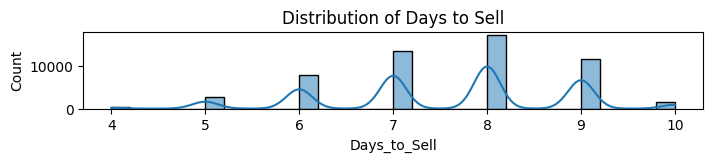

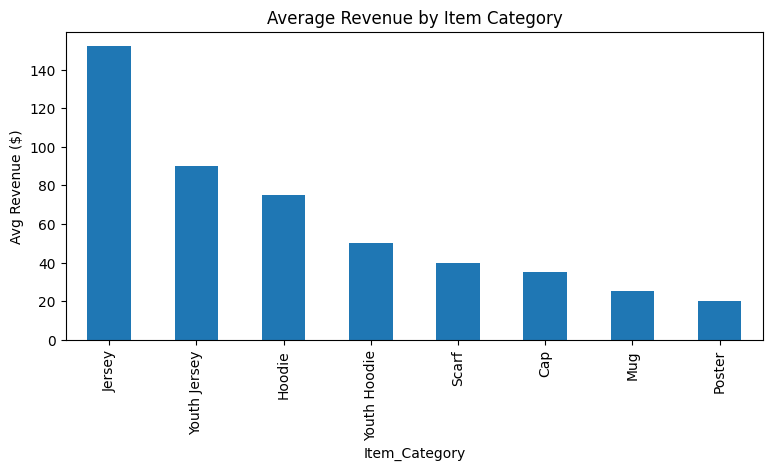

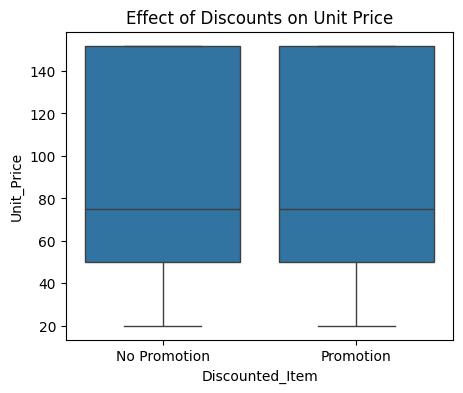

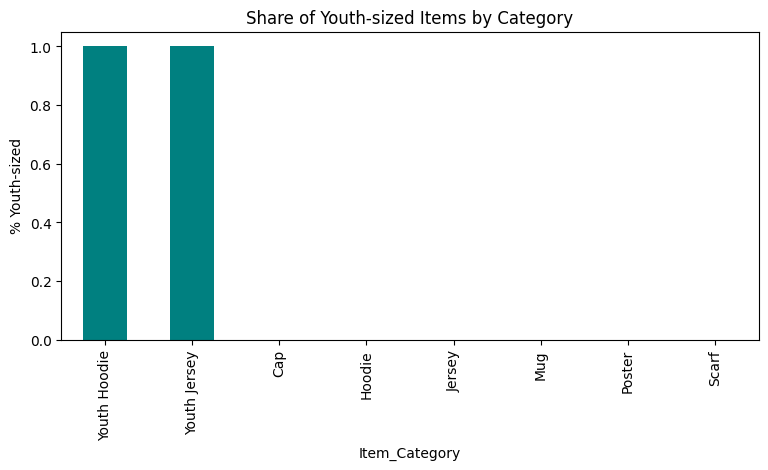

In [42]:
# Distribution of Days to Sell
plt.figure(figsize=(8,1))
sns.histplot(merch_dat['Days_to_Sell'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days to Sell')
plt.xlabel('Days_to_Sell')
plt.show()

# Average revenue by category
cat_rev = merch_dat.groupby('Item_Category')['Revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(9,4))
cat_rev.plot(kind='bar')
plt.title('Average Revenue by Item Category')
plt.ylabel('Avg Revenue ($)')
plt.show()

# Impact of Discounts
plt.figure(figsize=(5,4))
sns.boxplot(x='Discounted_Item', y='Unit_Price', data=merch_dat)
plt.title('Effect of Discounts on Unit Price')
plt.xticks([0,1], ['No Promotion','Promotion'])
plt.show()

# Youth-size share per category
youth_share = merch_dat.groupby('Item_Category')['Is_Youth_Size'].mean().sort_values(ascending=False)
youth_share.head(10).plot(kind='bar', color='teal', figsize=(9,4))
plt.title('Share of Youth-sized Items by Category')
plt.ylabel('% Youth-sized')
plt.show()

### Stadium Feature Engineering

In [43]:
stadium_dat.columns = stadium_dat.columns.str.lower()

# 1. Revenue share by source
total_rev = stadium_dat.groupby('month')['revenue'].transform('sum')
stadium_dat['Revenue_Share_%'] = (stadium_dat['revenue'] / total_rev) * 100

# 2. Month category mapping
stadium_dat['Month_Category'] = pd.cut(
    stadium_dat['month'],
    bins=[0,4,8,12],
    labels=['Preseason','Mid-season','Post-season']
)

stadium_dat.head()

,month,source,revenue,Revenue_Share_%,Month_Category
0,1,Upper Bowl,25020,-1.311757,Preseason
1,2,Upper Bowl,686664,17.354344,Preseason
2,3,Upper Bowl,434112,12.653427,Preseason
3,4,Upper Bowl,390879,16.836629,Preseason
4,5,Upper Bowl,286524,24.978249,Mid-season


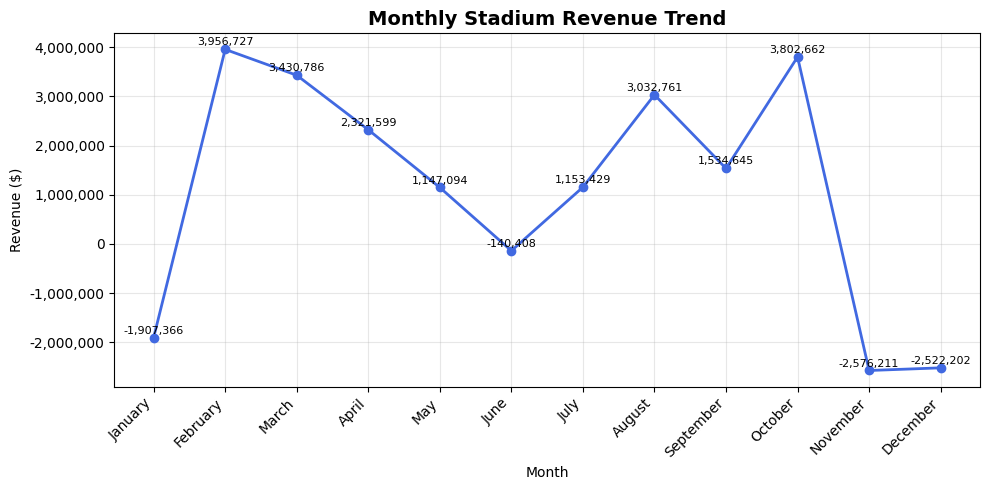

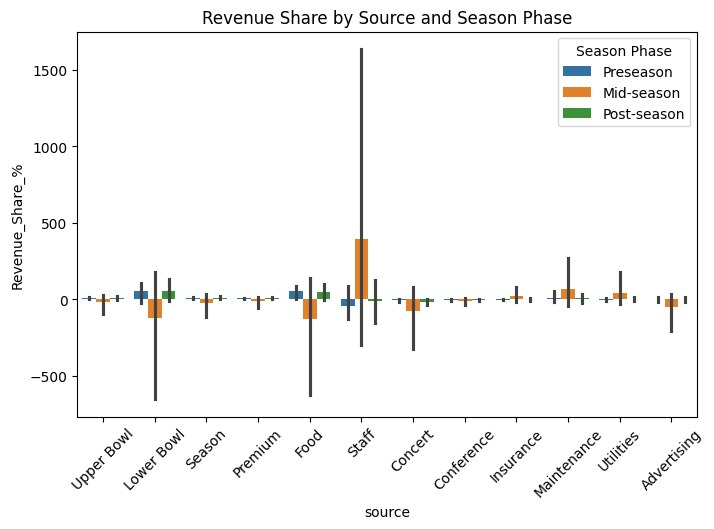

In [44]:
# Group total revenue per month
monthly_rev = stadium_dat.groupby('month')['revenue'].sum().reset_index()

# Convert month numbers → month names
monthly_rev['Month_Name'] = monthly_rev['month'].apply(lambda x: calendar.month_name[x])

# Sort in correct calendar order
monthly_rev = monthly_rev.sort_values('month')

# Plot
plt.figure(figsize=(10,5))
ax = plt.gca()

plt.plot(monthly_rev['Month_Name'], monthly_rev['revenue'], marker='o', linewidth=2, color='royalblue')

# Titles & labels
plt.title('Monthly Stadium Revenue Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# ✅ Format y-axis to show full numbers with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Optional: Add data labels above points
for i, row in monthly_rev.iterrows():
    plt.text(row['Month_Name'], row['revenue'] + monthly_rev['revenue'].max()*0.01,
             f'{row["revenue"]:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Revenue share by source category
plt.figure(figsize=(8,5))
sns.barplot(x='source', y='Revenue_Share_%', hue='Month_Category', data=stadium_dat)
plt.title('Revenue Share by Source and Season Phase')
plt.legend(title='Season Phase')
plt.xticks(rotation=45)
plt.show()

### Fan Feature Engineering

In [45]:
# Engagement_Score
fan_dat['Engagement_Score'] = (fan_dat['Games_Attended'] * 2) + (fan_dat['Seasonal_Pass'].astype(int) * 10)

# Optional: set an intended order, but allow us to remove unused levels later
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
fan_dat['Age_Group'] = pd.Categorical(fan_dat['Age_Group'], categories=age_order, ordered=True)

# Drop rows with missing Engagement_Score just in case (shouldn't be any)
fan_dat = fan_dat.dropna(subset=['Engagement_Score'])

# Compute the *present* categories actually in the data
present_age_levels = [lvl for lvl in age_order if lvl in fan_dat['Age_Group'].astype(str).unique()]

# If you want to strictly remove unused categories (helps seaborn/mpl internals)
fan_dat['Age_Group'] = fan_dat['Age_Group'].cat.remove_unused_categories()

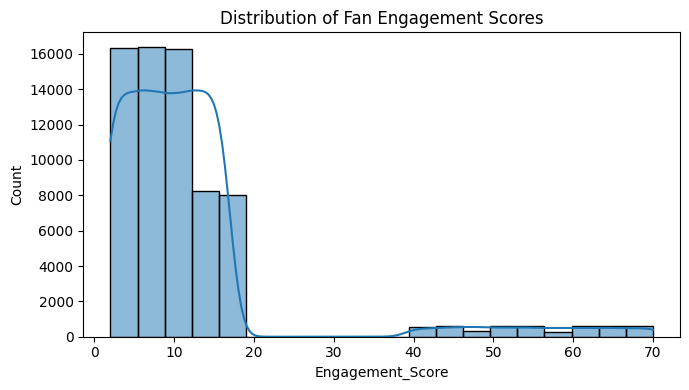

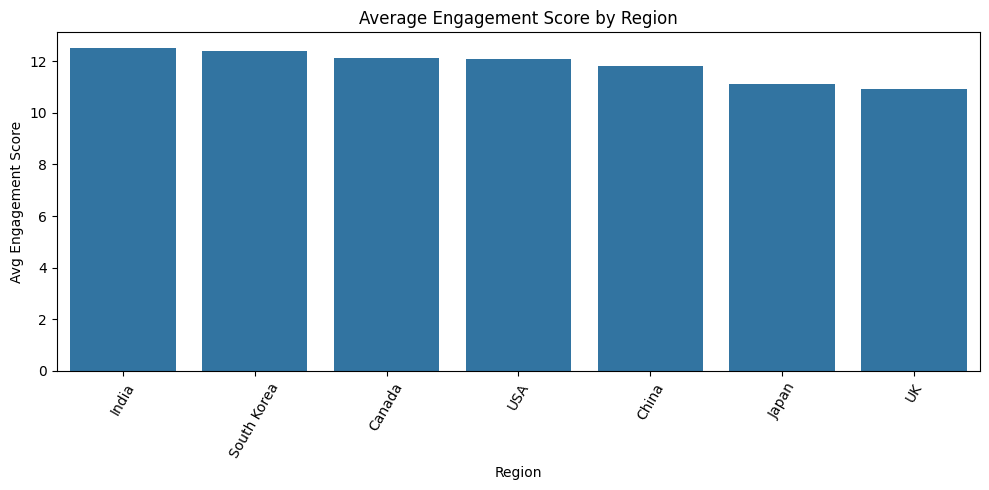

In [46]:
# 1) Engagement score distribution
plt.figure(figsize=(7,4))
sns.histplot(fan_dat['Engagement_Score'], bins=20, kde=True)
plt.title('Distribution of Fan Engagement Scores')
plt.xlabel('Engagement_Score')
plt.tight_layout()
plt.show()

# 2) Regional engagement (recompute region_summary if needed)
region_summary = (
    fan_dat.groupby('Customer_Region', as_index=False)
       .agg(Avg_Games_Attended=('Games_Attended','mean'),
            Pass_Adoption_Rate=('Seasonal_Pass','mean'),
            Avg_Engagement_Score=('Engagement_Score','mean'))
)

plt.figure(figsize=(10,5))
sns.barplot(
    x='Customer_Region',
    y='Avg_Engagement_Score',
    data=region_summary.sort_values('Avg_Engagement_Score', ascending=False)
)
plt.title('Average Engagement Score by Region')
plt.xlabel('Region')
plt.ylabel('Avg Engagement Score')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Simple Visualizations

Text(0.5, 1.0, 'Distribution of Merchandise Prices')

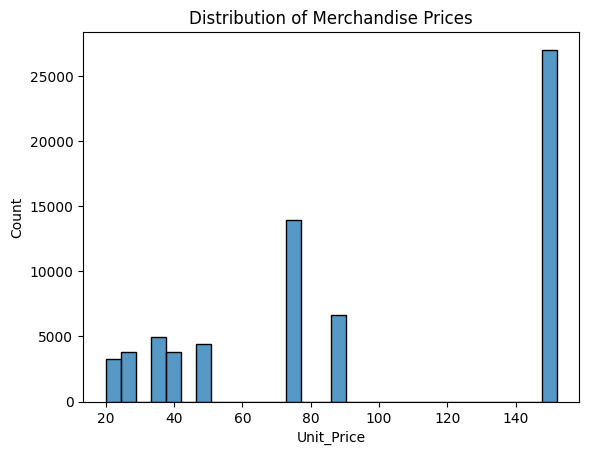

In [47]:
sns.histplot(merch_dat['Unit_Price'], bins=30)
plt.title("Distribution of Merchandise Prices")

<Axes: title={'center': 'Top-Selling Categories'}, ylabel='Item_Category'>

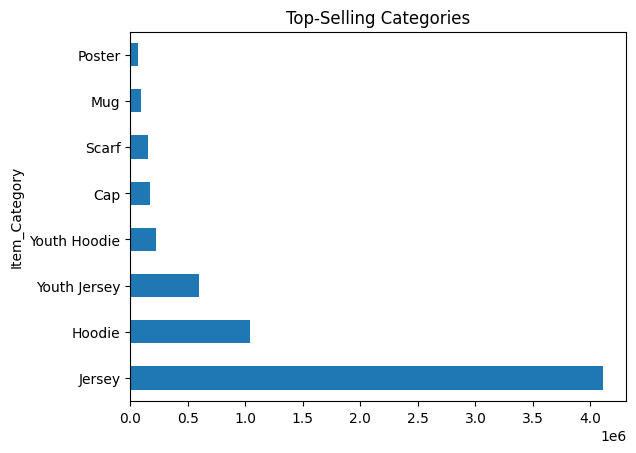

In [48]:
sales_by_cat = merch_dat.groupby('Item_Category')['Unit_Price'].sum().sort_values(ascending=False)
sales_by_cat.head(10).plot(kind='barh', title='Top-Selling Categories')

Text(0.5, 1.0, 'Daily Sales Trend')

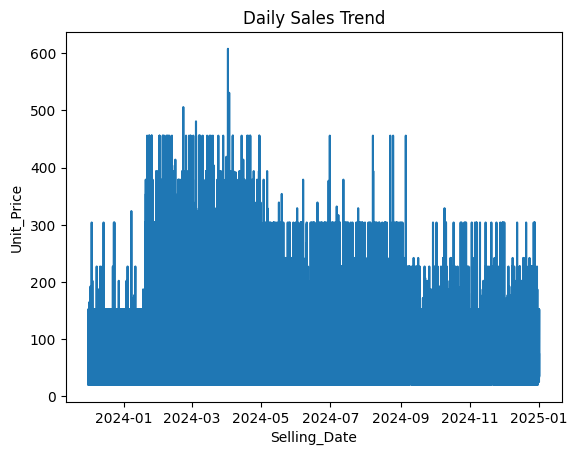

In [49]:
sales_by_day = merch_dat.groupby('Selling_Date')['Unit_Price'].sum().reset_index()
sns.lineplot(x='Selling_Date', y='Unit_Price', data=sales_by_day)
plt.title('Daily Sales Trend')

<Axes: xlabel='Promotion', ylabel='Unit_Price'>

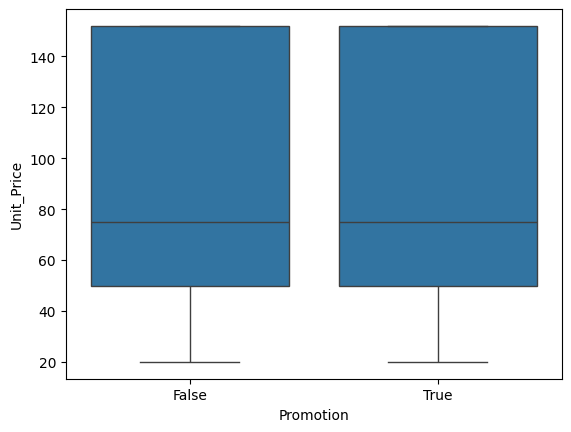

In [50]:
sns.boxplot(x='Promotion', y='Unit_Price', data=merch_dat)

<Axes: xlabel='Channel', ylabel='Unit_Price'>

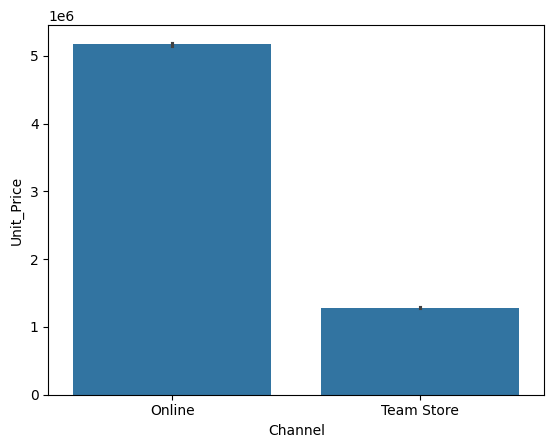

In [51]:
sns.barplot(x='Channel', y='Unit_Price', data=merch_dat, estimator='sum')

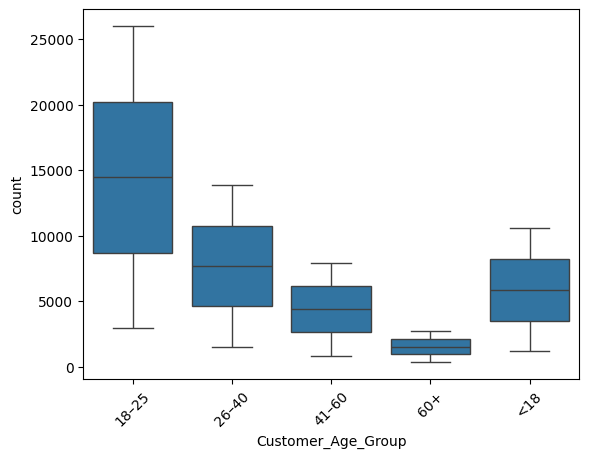

In [52]:
inconsistent_age_region = merch_dat.groupby(['Customer_Age_Group', 'Customer_Region']).size().reset_index(name='count')
# visualize unusual combos (e.g., regions with extremely low counts)
sns.boxplot(x='Customer_Age_Group', y='count', data=inconsistent_age_region)
plt.xticks(rotation=45)
plt.show()

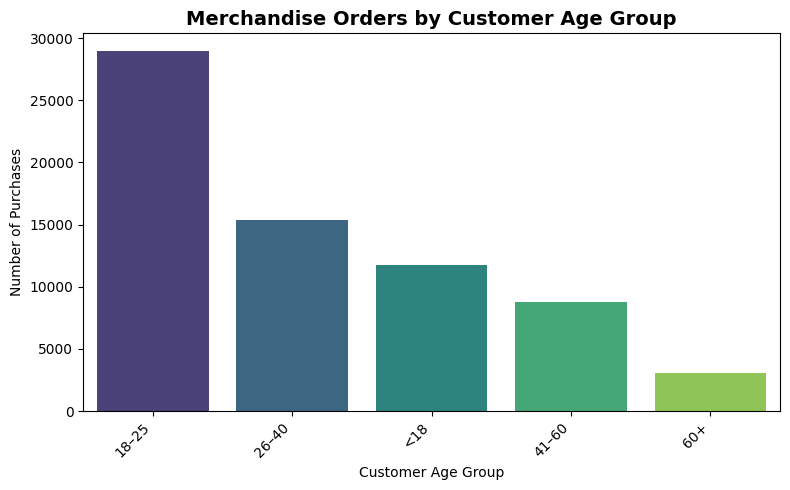

In [53]:
# Aggregate counts per age group
age_counts = merch_dat['Customer_Age_Group'].value_counts().reset_index()
age_counts.columns = ['Customer_Age_Group', 'Count']

# Plot with hue to satisfy new seaborn requirement
plt.figure(figsize=(8,5))
sns.barplot(
    x='Customer_Age_Group',
    y='Count',
    hue='Customer_Age_Group',
    data=age_counts,
    palette='viridis',
    legend=False
)

plt.title('Merchandise Orders by Customer Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Customer Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [54]:
stadium_dat.sample(5)

,month,source,revenue,Revenue_Share_%,Month_Category
51,4,Food,2227200,95.933880,Preseason
68,9,Staff,-3276000,-213.469565,Post-season
134,3,Advertising,432000,12.591867,Preseason
18,7,Lower Bowl,1778832,154.221196,Mid-season
61,2,Staff,-3400000,-85.929608,Preseason


In [55]:
stadium_dat['source'].unique()

array(['Upper Bowl', 'Lower Bowl', 'Season', 'Premium', 'Food', 'Staff',
       'Concert', 'Conference', 'Insurance', 'Maintenance', 'Utilities',
       'Advertising'], dtype=object)

In [56]:
stadium_dat['source'].value_counts()

Upper Bowl     12
Lower Bowl     12
Season         12
Premium        12
Food           12
Staff          12
Concert        12
Conference     12
Insurance      12
Maintenance    12
Utilities      12
Advertising    12
Name: source, dtype: int64

In [57]:
staff_rows = stadium_dat[stadium_dat['source'].str.contains('Staff', case=False, na=False)]
staff_rows.head()

,month,source,revenue,Revenue_Share_%,Month_Category
60,1,Staff,-2765000,144.964312,Preseason
61,2,Staff,-3400000,-85.929608,Preseason
62,3,Staff,-3318000,-96.712532,Preseason
63,4,Staff,-3362000,-144.813984,Preseason
64,5,Staff,-3361500,-293.044859,Mid-season


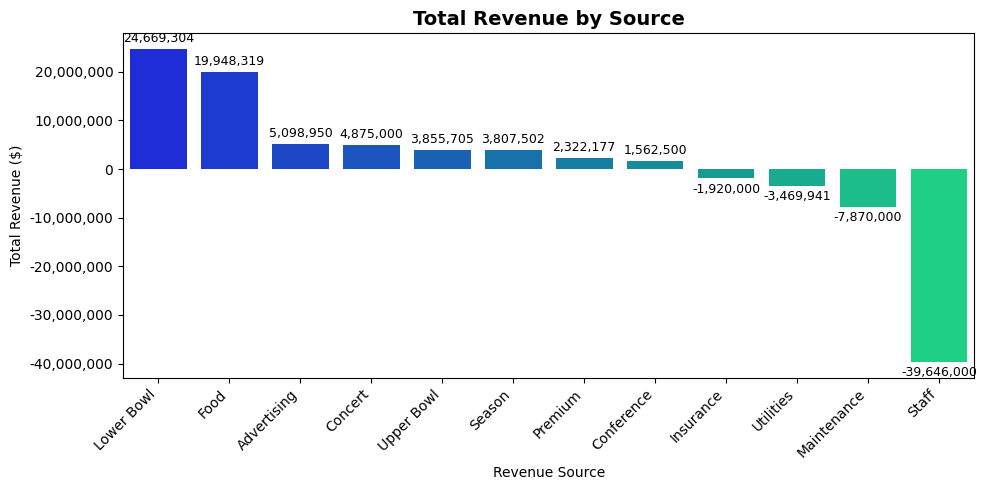

In [58]:
# Group and sum revenue by source
source_revenue = stadium_dat.groupby('source', as_index=False)['revenue'].sum()
source_revenue = source_revenue.sort_values('revenue', ascending=False)

# Plot bar chart with full numeric labels (no scientific notation)
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x='source',
    y='revenue',
    hue='source',
    data=source_revenue,
    palette='winter',
    legend=False
)

# Titles and labels
plt.title('Total Revenue by Source', fontsize=14, fontweight='bold')
plt.xlabel('Revenue Source')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')

# Format y-axis with full numbers and commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

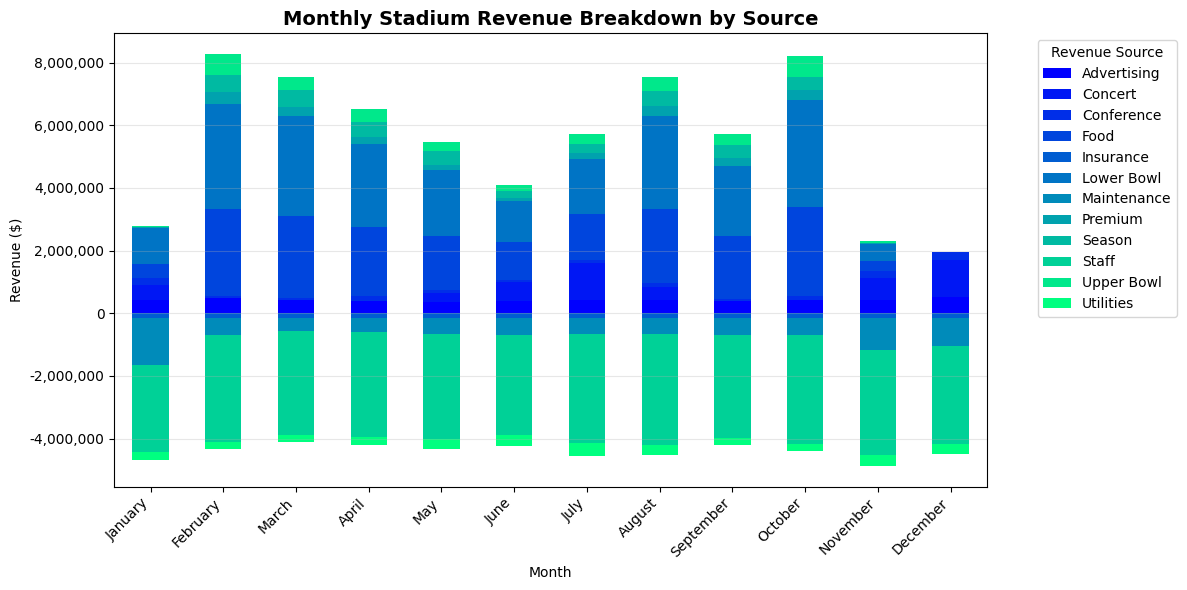

In [59]:
# ✅ 1. Prepare data
# Convert month number to month name
stadium_dat['Month_Name'] = stadium_dat['month'].apply(lambda x: calendar.month_name[x])

# Ensure correct month order
stadium_dat['Month_Name'] = pd.Categorical(
    stadium_dat['Month_Name'],
    categories=list(calendar.month_name)[1:],  # Jan–Dec
    ordered=True
)

# Pivot to wide format (one column per source)
pivot_df = stadium_dat.pivot_table(
    index='Month_Name',
    columns='source',
    values='revenue',
    aggfunc='sum'
).fillna(0)

# Sort months correctly
pivot_df = pivot_df.loc[list(calendar.month_name)[1:]]

# ✅ 2. Plot stacked bar chart
plt.figure(figsize=(12,6))
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='winter'
)

# Customize chart
plt.title('Monthly Stadium Revenue Breakdown by Source', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Revenue Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3, axis='y')

# Format y-axis with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

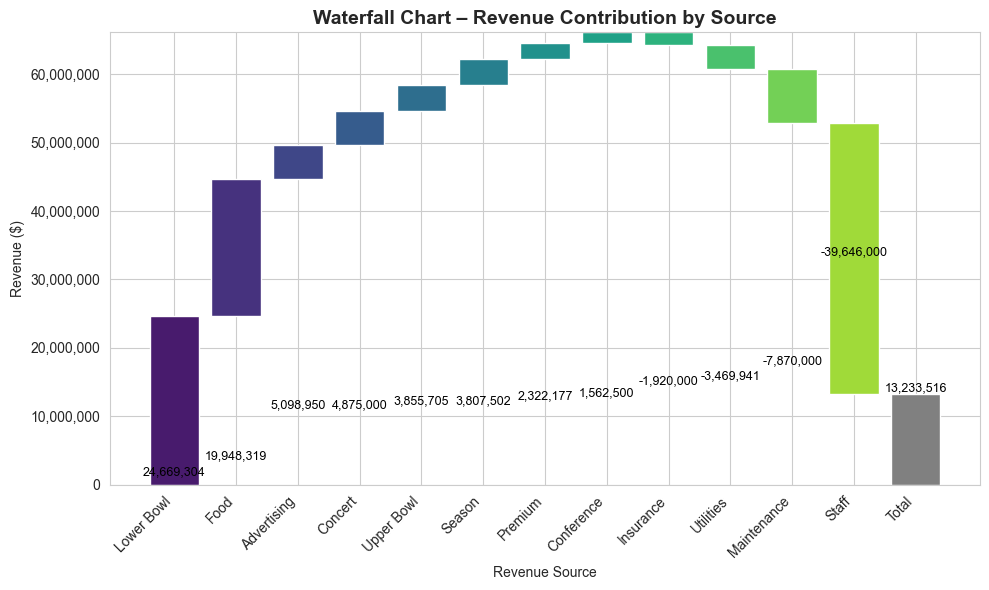

In [60]:
# ✅ 1. Base data
source_revenue = stadium_dat.groupby('source', as_index=False)['revenue'].sum()
source_revenue = source_revenue.sort_values('revenue', ascending=False).reset_index(drop=True)

# Compute cumulative sums for waterfall effect
source_revenue['Cumulative'] = source_revenue['revenue'].cumsum()
total_revenue = source_revenue['revenue'].sum()

# Add total as a final row
total_row = pd.DataFrame({'source': ['Total'], 'revenue': [total_revenue], 'Cumulative': [np.nan]})
source_revenue = pd.concat([source_revenue, total_row], ignore_index=True)

# ✅ 2. Create figure
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Track bar start positions
previous = 0
colors = sns.color_palette('viridis', n_colors=len(source_revenue))

# Plot bars one by one
for i, (src, rev) in enumerate(zip(source_revenue['source'], source_revenue['revenue'])):
    if src == 'Total':
        plt.bar(src, rev, color='grey')
    else:
        plt.bar(src, rev, bottom=previous, color=colors[i])
        previous += rev

# ✅ 3. Annotate bars
for i, (src, rev) in enumerate(zip(source_revenue['source'], source_revenue['revenue'])):
    plt.text(i, previous if src == 'Total' else previous - rev/2,
             f'{rev:,.0f}', ha='center', va='bottom', fontsize=9, color='black')

# ✅ 4. Styling
plt.title('Waterfall Chart – Revenue Contribution by Source', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)')
plt.xlabel('Revenue Source')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

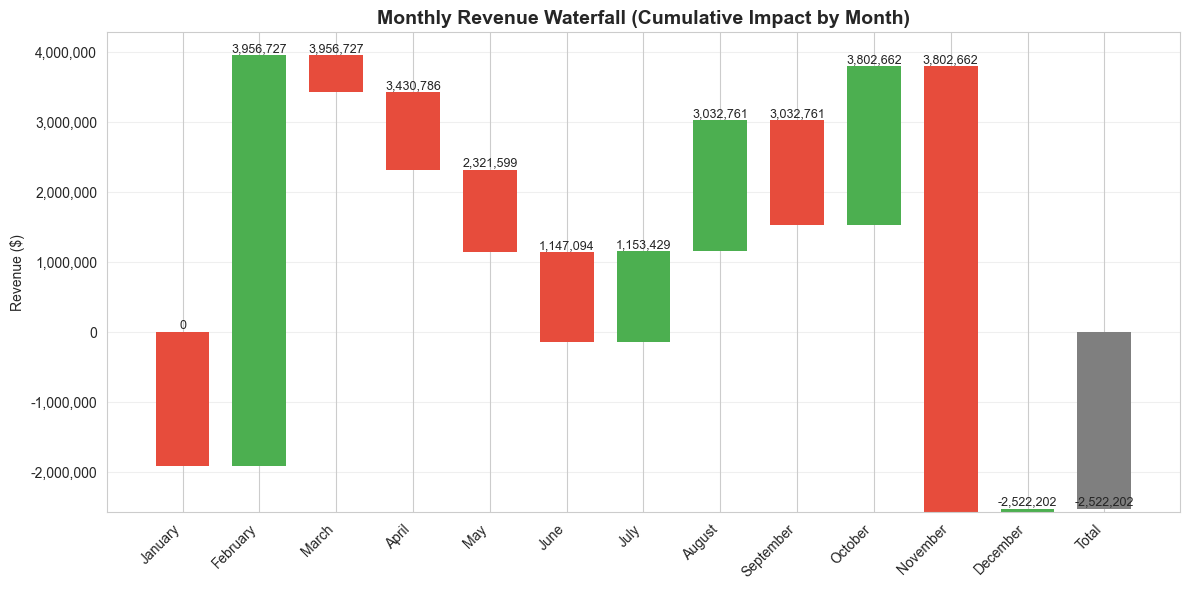

In [61]:
stadium = stadium_dat.copy()
stadium.columns = stadium.columns.str.lower()  # month, source, revenue

# Total revenue per month
monthly = (stadium.groupby('month', as_index=False)['revenue']
                  .sum()
                  .sort_values('month'))

# Month names in correct order
monthly['Month_Name'] = monthly['month'].apply(lambda x: calendar.month_name[x])
order = list(calendar.month_name)[1:]
monthly['Month_Name'] = pd.Categorical(monthly['Month_Name'], categories=order, ordered=True)
monthly = monthly.sort_values('Month_Name').reset_index(drop=True)

# --- Build waterfall components ---
# Delta vs previous month; first bar is January's level
monthly['Delta'] = monthly['revenue'].diff()
monthly.loc[0, 'Delta'] = monthly.loc[0, 'revenue']

# Running total
monthly['Running'] = monthly['Delta'].cumsum()

# Bar bottoms (start point of each waterfall bar)
bottom = []
running_prev = 0
for d in monthly['Delta']:
    if d >= 0:
        bottom.append(running_prev)
    else:
        bottom.append(running_prev + d)  # negative bar goes downward
    running_prev += d
monthly['Bottom'] = bottom

# Append a final Total bar
total_value = monthly['Running'].iloc[-1]
total_row = pd.DataFrame({
    'month': [None],
    'revenue': [total_value],
    'Month_Name': ['Total'],
    'Delta': [np.nan],
    'Running': [total_value],
    'Bottom': [0]
})
wf = pd.concat([monthly, total_row], ignore_index=True)

# --- Plot waterfall ---
plt.figure(figsize=(12,6))

# Colors: green for increases, red for decreases, gray for total
colors = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        colors.append('#7f7f7f')  # gray
    else:
        colors.append('#4CAF50' if row['Delta'] >= 0 else '#E74C3C')

# Heights: use Delta for months, Total uses final Running
heights = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        heights.append(row['Running'])
    else:
        heights.append(abs(row['Delta']))

# Bar positions / labels
x = np.arange(len(wf))
plt.bar(x, heights, bottom=wf['Bottom'], color=colors, width=0.7, edgecolor='none')

# Labels on bars
for xi, bot, h, name in zip(x, wf['Bottom'], heights, wf['Month_Name']):
    val = bot + h if name != 'Total' else h
    plt.text(xi, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Axis & styling
plt.xticks(x, wf['Month_Name'], rotation=45, ha='right')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue Waterfall (Cumulative Impact by Month)', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

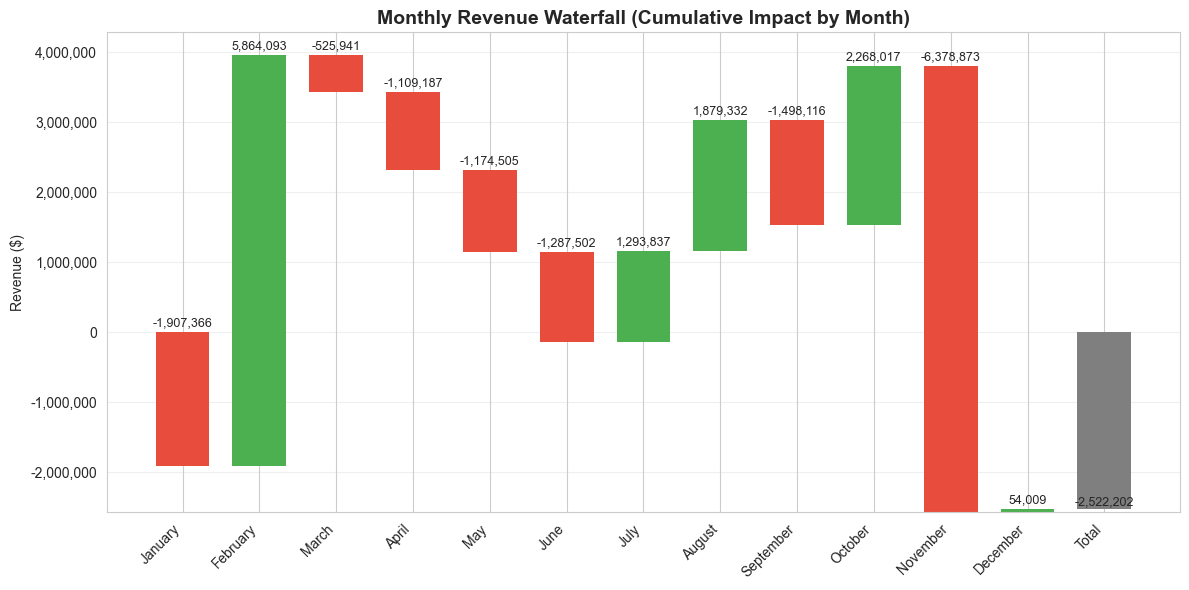

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import calendar

# --- Prep data ---
stadium = stadium_dat.copy()
stadium.columns = stadium.columns.str.lower()  # standardize
monthly = stadium.groupby('month', as_index=False)['revenue'].sum().sort_values('month')

# Month names (ordered)
monthly['Month_Name'] = monthly['month'].apply(lambda x: calendar.month_name[x])
order = list(calendar.month_name)[1:]
monthly['Month_Name'] = pd.Categorical(monthly['Month_Name'], categories=order, ordered=True)
monthly = monthly.sort_values('Month_Name').reset_index(drop=True)

# --- Build waterfall structure ---
monthly['Delta'] = monthly['revenue'].diff()
monthly.loc[0, 'Delta'] = monthly.loc[0, 'revenue']  # January base
monthly['Running'] = monthly['Delta'].cumsum()

bottom = []
running_prev = 0
for d in monthly['Delta']:
    if d >= 0:
        bottom.append(running_prev)
    else:
        bottom.append(running_prev + d)
    running_prev += d
monthly['Bottom'] = bottom

# Add final total
total_value = monthly['Running'].iloc[-1]
total_row = pd.DataFrame({
    'month': [None],
    'revenue': [total_value],
    'Month_Name': ['Total'],
    'Delta': [np.nan],
    'Running': [total_value],
    'Bottom': [0]
})
wf = pd.concat([monthly, total_row], ignore_index=True)

# --- Plot waterfall ---
plt.figure(figsize=(12,6))

colors = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        colors.append('#7f7f7f')  # gray
    else:
        colors.append('#4CAF50' if row['Delta'] >= 0 else '#E74C3C')

heights = []
for i, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        heights.append(row['Running'])
    else:
        heights.append(abs(row['Delta']))

x = np.arange(len(wf))
plt.bar(x, heights, bottom=wf['Bottom'], color=colors, width=0.7, edgecolor='none')

# --- Add value labels (show negative sign for red bars) ---
for xi, row in wf.iterrows():
    if row['Month_Name'] == 'Total':
        val = row['Running']
        label = f'{val:,.0f}'
        plt.text(xi, val, label, ha='center', va='bottom', fontsize=9)
    else:
        delta = row['Delta']
        y_pos = row['Bottom'] + abs(delta) + (0.01 * wf['Running'].max())
        sign = "-" if delta < 0 else ""
        plt.text(xi, y_pos, f'{sign}{abs(delta):,.0f}', ha='center', va='bottom', fontsize=9)

# --- Styling ---
plt.xticks(x, wf['Month_Name'], rotation=45, ha='right')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue Waterfall (Cumulative Impact by Month)', fontsize=14, fontweight='bold')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [63]:
cross = fan_dat.groupby(['Age_Group','Customer_Region']).size().reset_index(name='count')
cross = cross.sort_values('count')
cross.head(10)

,Age_Group,Customer_Region,count


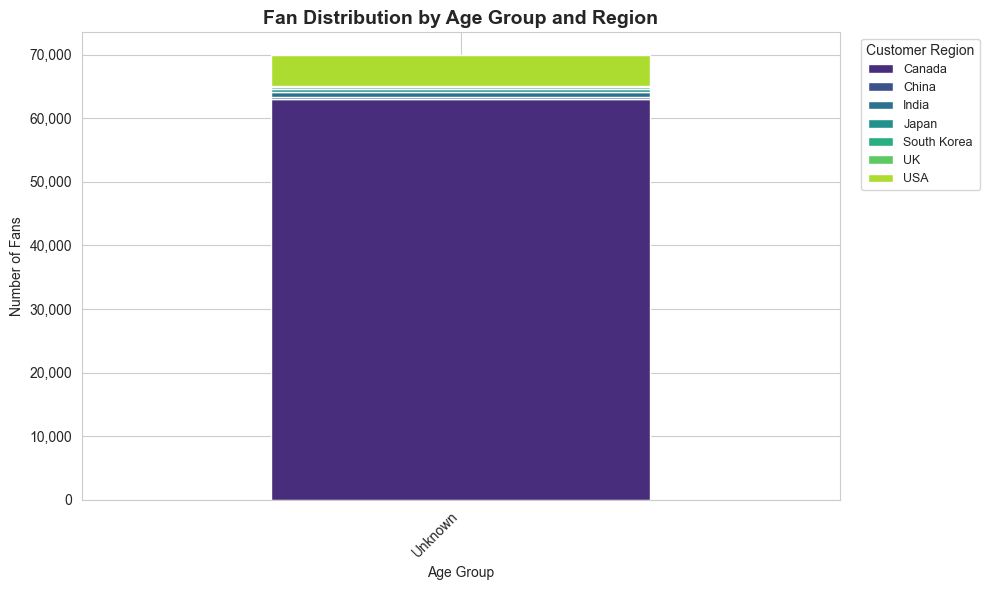

In [64]:

# 1) Clean + normalize Age_Group
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
fan = fan_dat.copy()

# Normalize strings; convert literal "nan"/"None" to real NaN; fill to "Unknown"
fan['Age_Group'] = (
    fan['Age_Group']
      .astype(str).str.strip()
      .replace({'nan': np.nan, 'None': np.nan, '': np.nan})
      .fillna('Unknown')
)

fan['Customer_Region'] = (
    fan['Customer_Region']
      .astype(str).str.strip()
      .replace({'nan': np.nan, 'None': np.nan, '': np.nan})
      .fillna('Unknown')
)

# Make Age_Group an ordered categorical so order sticks
full_age_order = age_order + ['Unknown']
fan['Age_Group'] = pd.Categorical(fan['Age_Group'], categories=full_age_order, ordered=True)

# 2) Crosstab (counts)
ct = pd.crosstab(fan['Age_Group'], fan['Customer_Region']).sort_index()  # respects categorical order
# Ensure axis labels are plain strings
ct.index = ct.index.astype(str)

# 3) Plot stacked bars
colors = sns.color_palette('viridis', n_colors=ct.shape[1])

ax = ct.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

plt.title('Fan Distribution by Age Group and Region', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Number of Fans')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Region', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

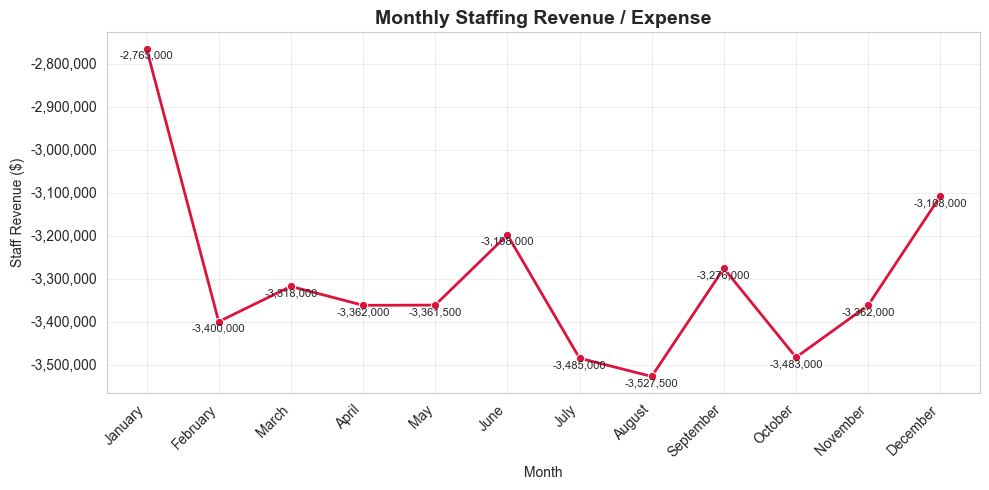

In [65]:
# ✅ Filter only staff-related rows
staff_rows = stadium_dat[stadium_dat['source'].str.contains('staff', case=False, na=False)].copy()

# ✅ Group by month (sum all staff categories)
staff_summary = staff_rows.groupby('month', as_index=False)['revenue'].sum()
staff_summary.rename(columns={'revenue': 'Staff_Revenue'}, inplace=True)

# ✅ Add month names for readability
staff_summary['Month_Name'] = staff_summary['month'].apply(lambda x: calendar.month_name[x])
staff_summary['Month_Name'] = pd.Categorical(
    staff_summary['Month_Name'],
    categories=list(calendar.month_name)[1:],  # Jan–Dec
    ordered=True
)

# ✅ Sort chronologically
staff_summary = staff_summary.sort_values('Month_Name')

# ✅ Plot
plt.figure(figsize=(10,5))
ax = sns.lineplot(
    data=staff_summary,
    x='Month_Name',
    y='Staff_Revenue',
    marker='o',
    linewidth=2,
    color='crimson'
)

plt.title('Monthly Staffing Revenue / Expense', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Staff Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# ✅ Format y-axis to show full numbers (no 1e6)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# ✅ Optional: Add labels above points
for i, row in staff_summary.iterrows():
    plt.text(
        row['Month_Name'],
        row['Staff_Revenue'] + staff_summary['Staff_Revenue'].max() * 0.01,
        f'{row["Staff_Revenue"]:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

C:\Users\vince\AppData\Local\Temp\ipykernel_7500\2019995234.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


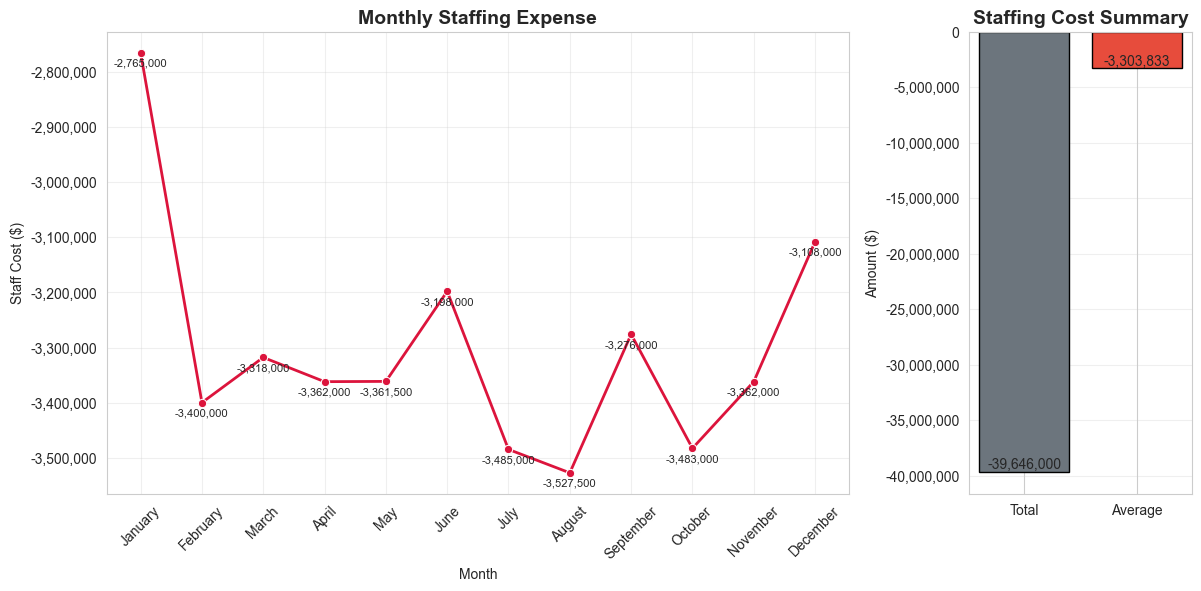

In [66]:
# --- Prep staff data ---
staff_rows = stadium_dat[stadium_dat['source'].str.contains('staff', case=False, na=False)].copy()

staff_summary = (staff_rows
                 .groupby('month', as_index=False)['revenue']
                 .sum()
                 .rename(columns={'revenue':'Staff_Revenue'}))

# Month names in calendar order
staff_summary['Month_Name'] = staff_summary['month'].apply(lambda x: calendar.month_name[x])
staff_summary['Month_Name'] = pd.Categorical(
    staff_summary['Month_Name'],
    categories=list(calendar.month_name)[1:],  # Jan–Dec
    ordered=True
)
staff_summary = staff_summary.sort_values('Month_Name')

# Totals for right-side bars
total_staff_cost = staff_summary['Staff_Revenue'].sum()
avg_staff_cost   = staff_summary['Staff_Revenue'].mean()

# --- Build composite figure ---
plt.figure(figsize=(14,6))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[4, 1.2], wspace=0.25)

# LEFT: Monthly staffing trend line
ax1 = plt.subplot(gs[0, 0])
sns.lineplot(
    data=staff_summary,
    x='Month_Name',
    y='Staff_Revenue',
    marker='o',
    linewidth=2,
    color='crimson',
    ax=ax1
)
ax1.set_title('Monthly Staffing Expense', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Staff Cost ($)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)
ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Optional: add labels above points
for _, r in staff_summary.iterrows():
    ax1.text(r['Month_Name'], r['Staff_Revenue'] + 0.01*staff_summary['Staff_Revenue'].max(),
             f"{r['Staff_Revenue']:,.0f}", ha='center', va='bottom', fontsize=8)

# RIGHT: Total & Average bars (grey and red)
ax2 = plt.subplot(gs[0, 1])
bar_labels = ['Total', 'Average']
bar_values = [total_staff_cost, avg_staff_cost]
bar_colors = ['#6c757d', '#E74C3C']  # grey, red

bars = ax2.bar(bar_labels, bar_values, color=bar_colors, edgecolor='black')

ax2.set_title('Staffing Cost Summary', fontsize=14, fontweight='bold')
ax2.set_ylabel('Amount ($)')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for b, v in zip(bars, bar_values):
    ax2.text(b.get_x() + b.get_width()/2, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

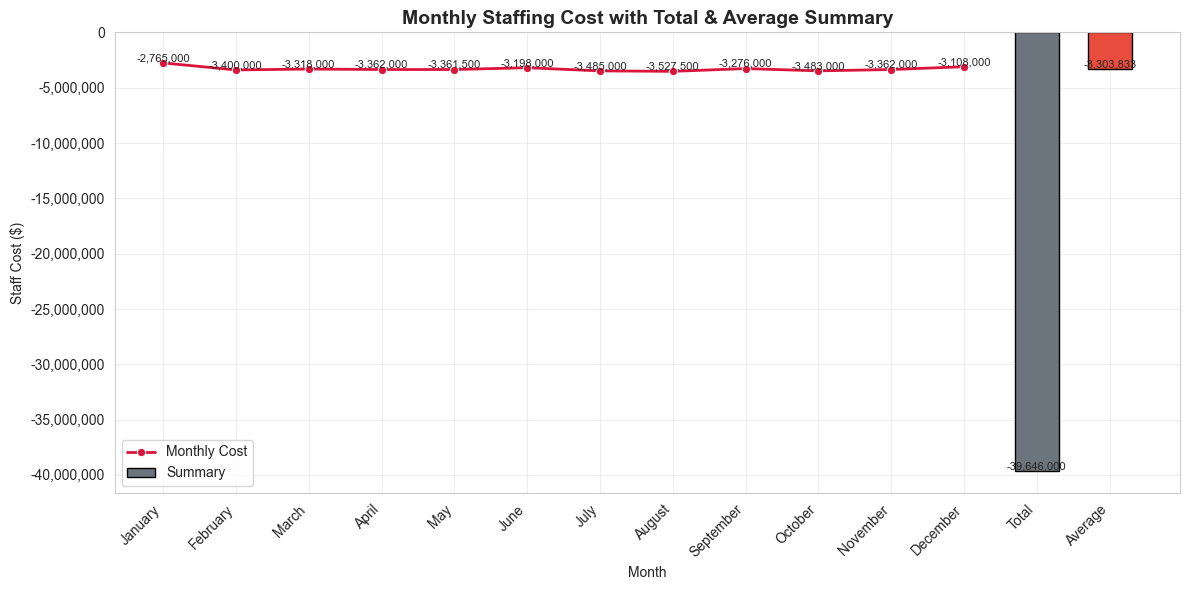

In [67]:
# --- Prepare staff data ---
staff_rows = stadium_dat[stadium_dat['source'].str.contains('staff', case=False, na=False)].copy()
staff_summary = (
    staff_rows.groupby('month', as_index=False)['revenue']
    .sum()
    .rename(columns={'revenue': 'Staff_Revenue'})
)
staff_summary['Month_Name'] = staff_summary['month'].apply(lambda x: calendar.month_name[x])
staff_summary['Month_Name'] = pd.Categorical(
    staff_summary['Month_Name'], categories=list(calendar.month_name)[1:], ordered=True
)
staff_summary = staff_summary.sort_values('Month_Name')

# Totals and averages
total_staff_cost = staff_summary['Staff_Revenue'].sum()
avg_staff_cost = staff_summary['Staff_Revenue'].mean()

# Add “Total” and “Average” as pseudo-months for the bars
summary_rows = pd.DataFrame({
    'Month_Name': ['Total', 'Average'],
    'Staff_Revenue': [total_staff_cost, avg_staff_cost]
})
plot_df = pd.concat([staff_summary[['Month_Name', 'Staff_Revenue']], summary_rows], ignore_index=True)

# --- Plot combined chart ---
plt.figure(figsize=(12,6))
ax = plt.gca()

# Line for monthly trend (Jan–Dec)
sns.lineplot(
    data=staff_summary,
    x='Month_Name',
    y='Staff_Revenue',
    marker='o',
    linewidth=2,
    color='crimson',
    ax=ax,
    label='Monthly Cost'
)

# Bars for Total and Average at the end
bar_data = plot_df.iloc[-2:]  # last 2 rows
ax.bar(bar_data['Month_Name'], bar_data['Staff_Revenue'],
       color=['#6c757d', '#E74C3C'], width=0.6, edgecolor='black', label='Summary')

# Format y-axis
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Monthly Staffing Cost with Total & Average Summary', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Staff Cost ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# Add numeric labels
for i, row in plot_df.iterrows():
    plt.text(row['Month_Name'], row['Staff_Revenue'] + 0.01 * plot_df['Staff_Revenue'].max(),
             f"{row['Staff_Revenue']:,.0f}", ha='center', va='bottom', fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

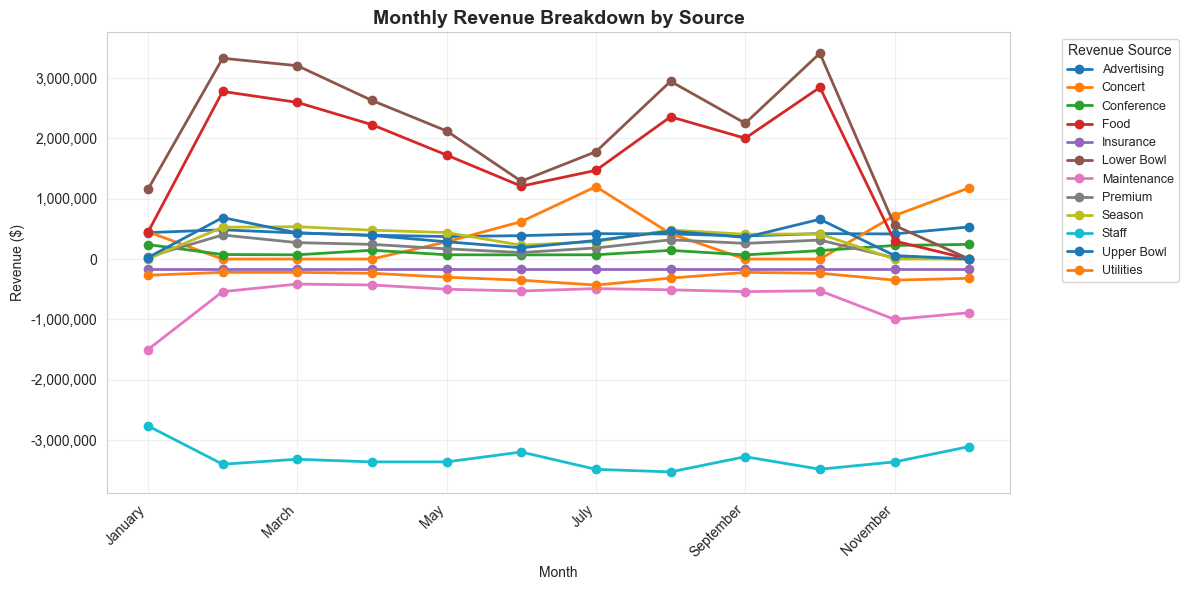

In [79]:
stadium_pivot = stadium_pivot.copy()
stadium_pivot.index = [calendar.month_name[m] for m in stadium_pivot.index]

# Sort months correctly (1–12 order)
ordered_months = list(calendar.month_name)[1:]
stadium_pivot = stadium_pivot.reindex(ordered_months)

# --- Plot ---
plt.figure(figsize=(12,6))
ax = stadium_pivot.plot(
    kind='line',
    marker='o',
    linewidth=2,
    figsize=(12,6)
)

plt.title('Monthly Revenue Breakdown by Source', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# Format y-axis with full numbers (no 1e6)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Legend formatting
plt.legend(title='Revenue Source', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()